In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
df=sns.load_dataset('titanic')

In [7]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# A. Basic Understanding & Data Quality
1. How many passengers are there in the dataset? How many survived vs did not survive?
2. What percentage of data is missing in each column?
3. How does the age distribution look? Are there any outliers?
4. What is the gender distribution of passengers?
5. How many passengers belong to each passenger class?

In [16]:
# 1. How many passengers are there in the dataset? How many survived vs did not survive?
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='survived', ylabel='count'>

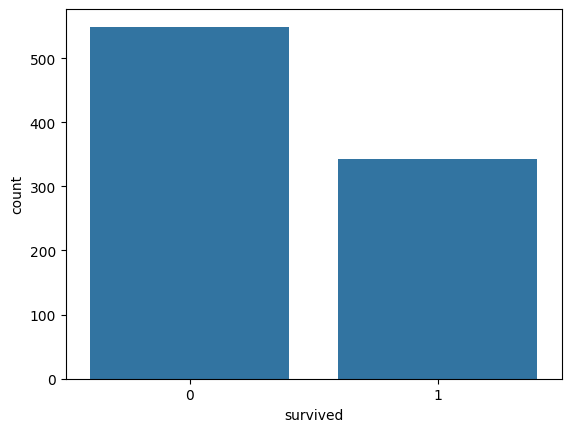

In [17]:
sns.countplot(x='survived', data=df)

In [18]:
# 2. What percentage of data is missing in each column?
(df.isnull().sum() / len(df)) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

<Axes: xlabel='age'>

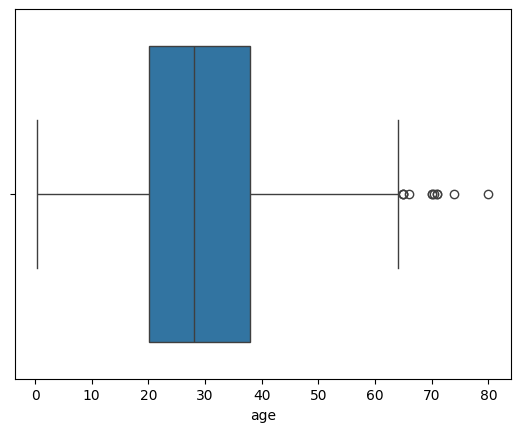

In [19]:
# 3. How does the age distribution look? Are there any outliers?
sns.boxplot(x=df['age'])

In [20]:
# 4. What is the gender distribution of passengers?
df['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

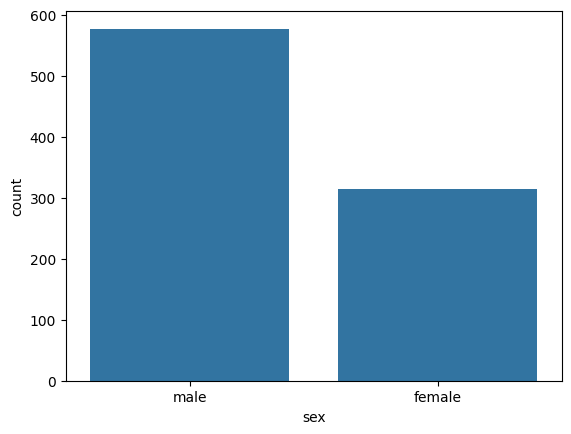

In [21]:
sns.countplot(x='sex', data=df)

In [22]:
# 5. How many passengers belong to each passenger class?
df['pclass'].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='pclass', ylabel='count'>

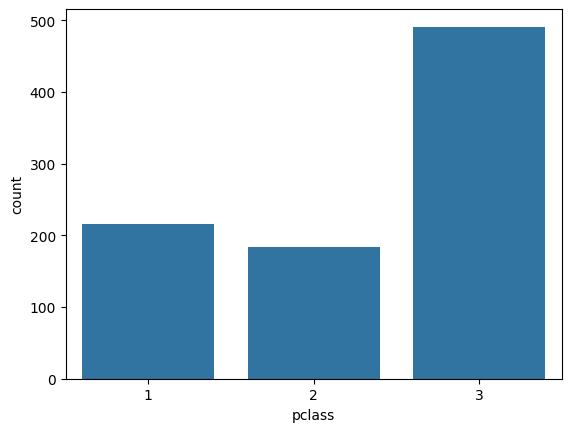

In [23]:
sns.countplot(x='pclass', data=df)

# B. Univariate Analysis
6. What is the distribution of passenger ages?
7. What is the fare distribution, and is it skewed?
8. Which embarkation port has the highest number of passengers?
9. What proportion of passengers were traveling alone vs with family?
10. How many children (age < 12) were onboard?

<Axes: xlabel='age', ylabel='Count'>

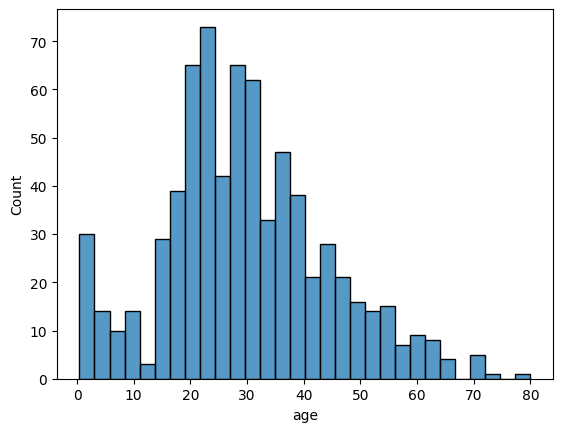

In [26]:
# 6. What is the distribution of passenger ages?
sns.histplot(df['age'], bins=30)

<Axes: xlabel='fare', ylabel='Count'>

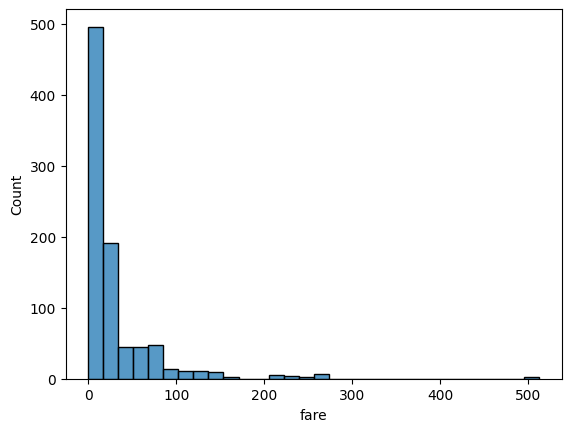

In [27]:
# 7. What is the fare distribution, and is it skewed?
sns.histplot(df['fare'], bins=30)

In [28]:
# 8. Which embarkation port has the highest number of passengers?
df['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='embarked', ylabel='count'>

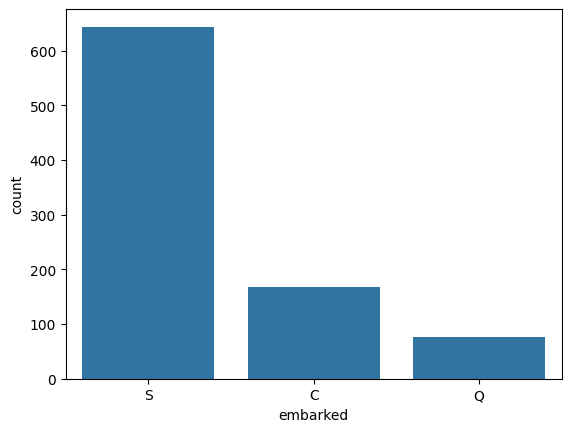

In [29]:
sns.countplot(x='embarked', data=df)

In [30]:
# 9. What proportion of passengers were traveling alone vs with family?
df['alone'].value_counts()

alone
True     537
False    354
Name: count, dtype: int64

<Axes: xlabel='alone', ylabel='count'>

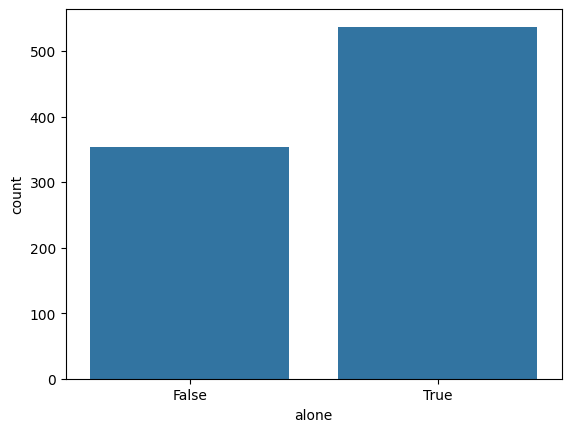

In [31]:
sns.countplot(x='alone', data=df)

In [32]:
# 10. How many children (age < 12) were onboard?
df[df['age'] < 12].shape[0]

68

# C. Bivariate Analysis
11. How does survival rate differ by gender?
12. What is the relationship between passenger class and survival?
13. Does age affect survival probability?
14. How does fare relate to survival?
15. Does embarking port influence survival rate?

<Axes: xlabel='sex', ylabel='survived'>

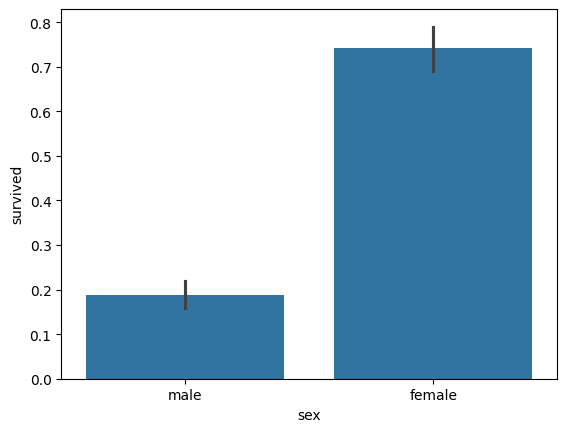

In [33]:
# 11. How does survival rate differ by gender?
sns.barplot(x='sex', y='survived', data=df)

<Axes: xlabel='pclass', ylabel='survived'>

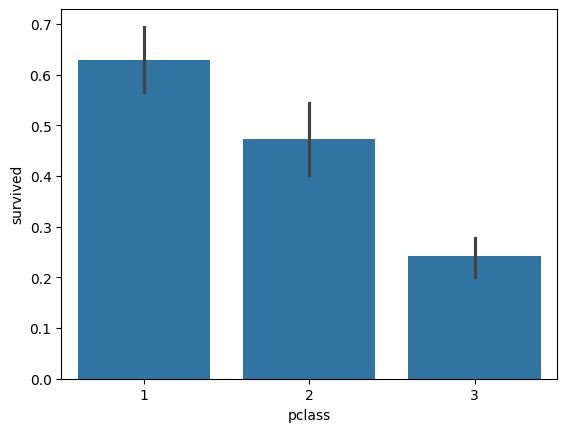

In [34]:
# 12. What is the relationship between passenger class and survival?
sns.barplot(x='pclass', y='survived', data=df)

<Axes: xlabel='survived', ylabel='age'>

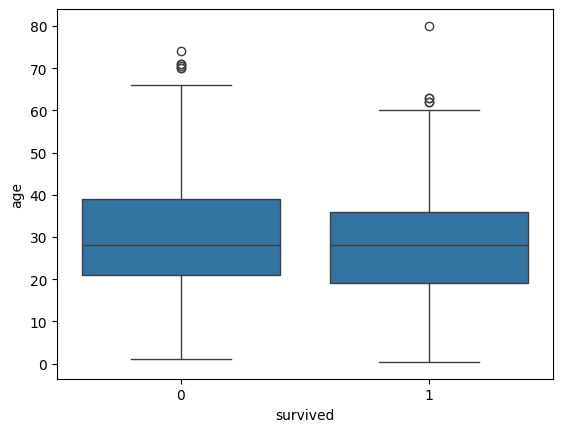

In [35]:
# 13. Does age affect survival probability?
sns.boxplot(x='survived', y='age', data=df)

<Axes: xlabel='survived', ylabel='fare'>

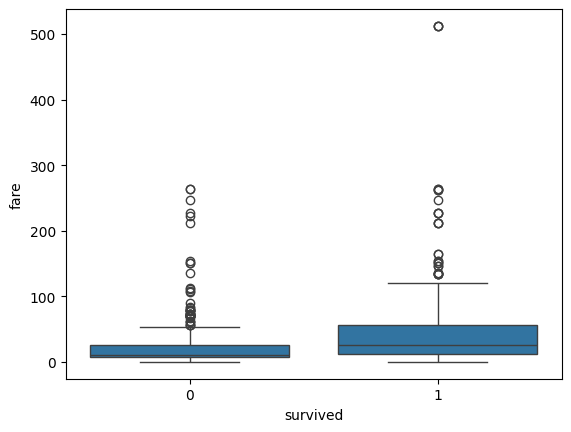

In [36]:
# 14. How does fare relate to survival?
sns.boxplot(x='survived', y='fare', data=df)

<Axes: xlabel='embarked', ylabel='survived'>

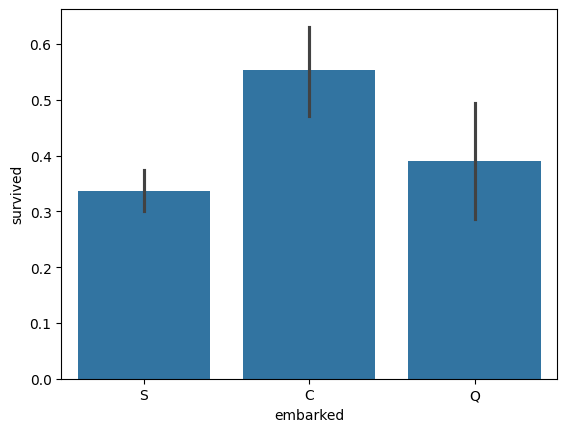

In [37]:
# 15. Does embarking port influence survival rate?
sns.barplot(x='embarked', y='survived', data=df)

# D. Multivariate Analysis
16. How does survival vary across gender and passenger class together?
17. What is the survival pattern for families vs solo travelers across classes?
18. How does age, fare, and class together influence survival?
19. Are women and children given priority across all classes?
20. How does survival differ for males and females across embarkation ports?

<Axes: xlabel='pclass', ylabel='survived'>

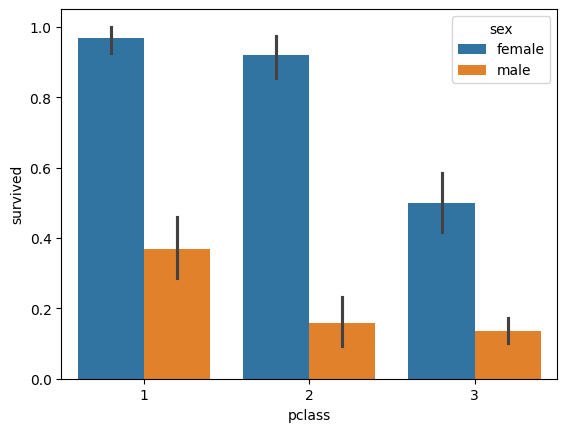

In [38]:
# 16. How does survival vary across gender and passenger class together?
sns.barplot(x='pclass', y='survived', hue='sex', data=df)

<Axes: xlabel='pclass', ylabel='survived'>

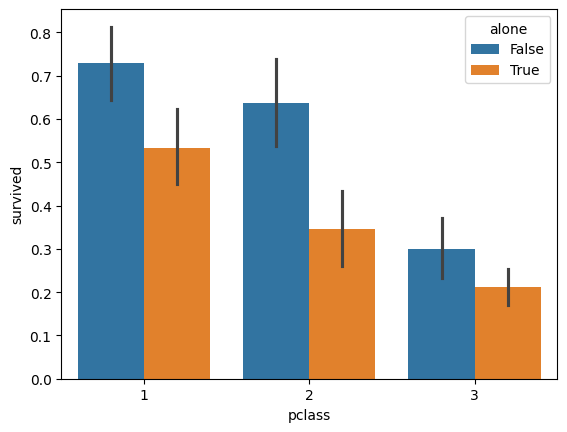

In [39]:
# 17. What is the survival pattern for families vs solo travelers across classes?
sns.barplot(x='pclass', y='survived', hue='alone', data=df)

<Axes: xlabel='age', ylabel='fare'>

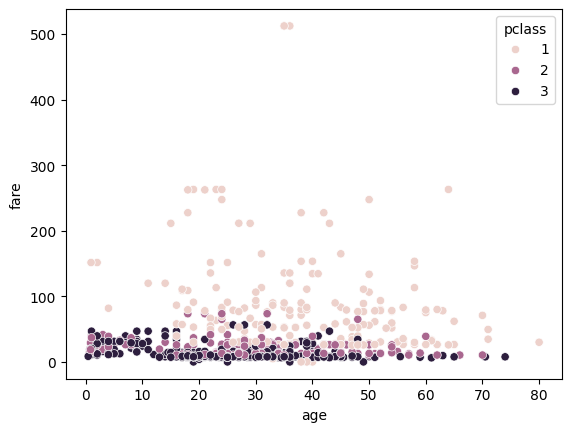

In [40]:
# 18. How does age, fare, and class together influence survival?
sns.scatterplot(x='age', y='fare', hue='pclass', data=df)

<Axes: xlabel='pclass', ylabel='survived'>

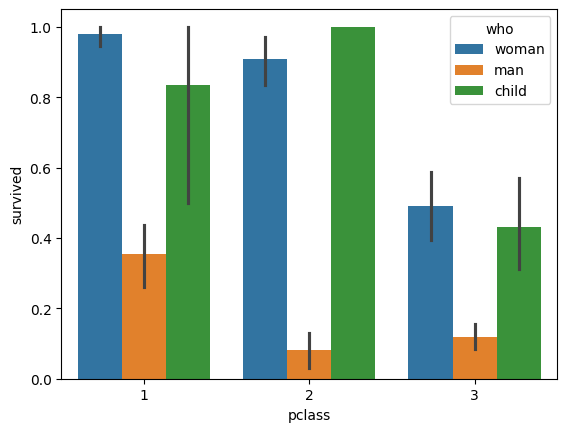

In [41]:
# 19. Are women and children given priority across all classes?
sns.barplot(x='pclass', y='survived', hue='who', data=df)

<Axes: xlabel='embarked', ylabel='survived'>

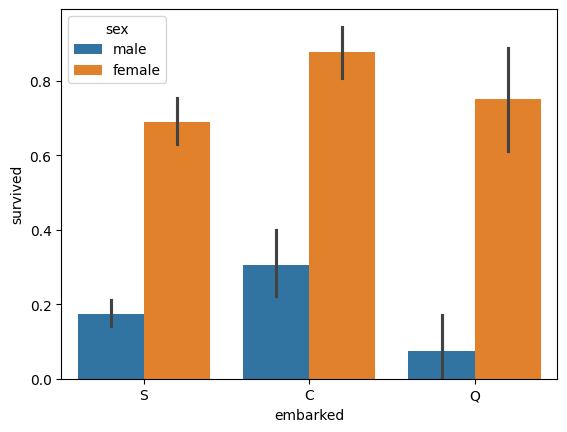

In [42]:
# 20. How does survival differ for males and females across embarkation ports?
sns.barplot(x='embarked', y='survived', hue='sex', data=df)